# Grafovi

U ovom poglavlju ćemo uvesti neke osnovne elemente teorije grafova koje čine osnovu na kojoj se zasniva oblast Grafovskih neuronskih mreža sa mehanizmom pažnje (GAT). Zbog velikog spektra primena, kao i izuzetno jednostavne definicije i osnovnih svojstava, grafovi su našli i veliku primenu u mnogim matematičkim oblastima poput kombinatorike, operacionih istrazivanja, linearne algebre, računarstva itd. 

## 1. Osnovni pojmovi teorije grafova

**Definijcija 1.1** Graf *G* predstavlja uređeni par $(V,E)$. Elementi skupa *V* se nazivaju *čvorovi* (eng. *vertex*), a elementi skupa *E grane* (eng. *edge*) grafa *G* gde je $E \subseteq V \times V $ .  

Dva čvora $u,v$ su *susedni* ako su spojeni granom $e=\{u,v\}$. Za čvor $u$ i granu $e$ tada kažemo da su *incidentni*.

Grafovi se prema usmerenosti mogu podeliti na:
- *Neusmerene grafove*, za koje važi da nemaju svojstvo usmerenja između čvorova sa kojima su incidenti, zbog čega grane smatramo skupovima čvorova i pišemo, npr. $e=\{u,v\}$.
- *Usmerene grafove*, za koje važi da grane imaju svojstvo usmerenja od jednog čvora, koji se naziva *izlazni čvor* ka drugom čvoru koji se naziva *ulazni čvor*. U tom slučaju, grane grafa ne smatramo skupovima već uređenim parovima i pišemo, npr, $e=(u,v), e=(v,u)$, u zavisnosti od smera usmerenja grane e incidentne sa čvorovima $u,v$.

Grafovi se grafički predstavljaju na sledeći način:
- Svaki čvor se predstavlja jednim krugom
- Svaka grana se predstavlja linijom koja povezuje čvorove sa kojima je incidentna. Ako je graf usmeren, onda se koristi strelica u smeru od izlaznog čvora ka ulaznom čvoru incidentinim sa tom granom.

Na slici 1.1 je dat primer prikaza 3 grafa:
- Graf $G_1=(V_1,E_1)$, gde je $V_1=\{a,b,c\}, E_1=\{ (a,b),(b,c),(c,b),(c,a)\}$, primer je usmerenog grafa.
- Graf $G_2=(V_1,E_1)$, gde je $V_1=\{a,b,c,d\}, E_1=\{ \{a,b\},\{c,b\},\{a,d\},\{c,d\}\}$, primer je neusmerenog grafa.

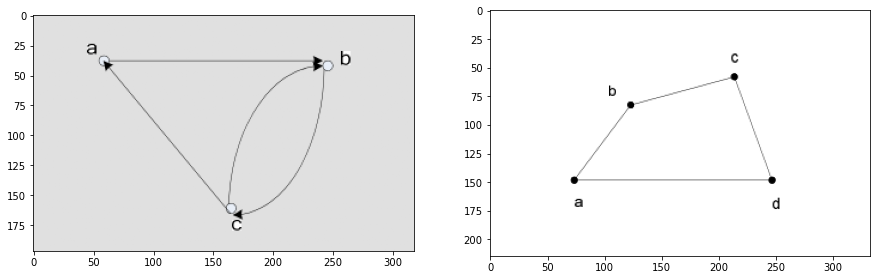

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 15 ,10

img_A = mpimg.imread('./da.png')
img_B = mpimg.imread('./ne.png')

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)


Grafovi su apstraktni pojmovi koji se mogu susresti u svakodnevnom životu i značajni su jer se veliki broj koncepata može modelovati njima.
Ako posmatramo neku geografsku mapu sa mnoštvom gradova koji su povezani nekim putevima-dobijamo jedan graf. Strukturna formula nekog molekula ili jedinjenja predstavlja takođe jedan graf . Društvene mreže se prirodno mogu opisati grafom u kojem se svakom korisniku društvene mreže dodeljuje čvor, a grana između dva čvora postoji ukoliko su korisnici 'prijatelji' (facebook, neusmeren graf), ili ako jedan korisnik 'prati' drugog korisnika(Twitter, usmeren graf).

## 2. Računarska reprezentacija grafova

S obzirom da postoji veliki broj podataka u problemima koji se modeluju grafovima, postavlja se pitanje iybora njihove reprezentacije u računarima. Najčešće se za predstavljanje grafova koristi matrična reprezentacija.

**Definicija 2:** Matrica susedstva A *grafa* $G=(V,E)$, dimenzija $\mid V\mid \times \mid V\mid$, definiše se na sledeći način: $$A_{ij}=
\begin{cases}
1 & \{i,j\} \in E \\
0 & \{i,j\} \notin E \\
\end{cases}
$$

Ako je graf neusmeren, onda je matrica A simetrična, pa nije potrebno čuvati sve elemente matrice, već samo njenu gornje-trougaonu reprezentaciju. Čak i ako grafovi nisu neusmereni, oni su često *retki*, odnosno, nemaju veliki broj grana, pa se matrice susedstava čuvaju u specifičnim strukturama podataka koje se nazivaju retke matrice. One imaju dve značajne pogodnosti za korišćenje u odnosu na ne-retke matrice.
- Ne-retke matrice zahtevaju memorijski prostor asimptotske složenosti $O(\mid V\mid^2)$, dok retke matrice zahtevaju memorijski prostor asimptotske složenosti $O(\mid E\mid)$.
- Operacije koje se izvršavaju nad retkim matricama su efikasnije u odnosu na operacije nad uobičajenim reprezentacijama matricama. U algoritmima mašinskog učenja, značajna operacija je množenje matrica i vektora. Složenost je ista kao i u prethodnom primeru, i to značajno ubrzava proces.

Grafovske neuronske mreže sa mehanizmom pažnje (GATs) su novije neuronske mreže koje rade sa podacima koji su predstavljeni i strukturirani grafom, koje koriste maskirane slojeve mehanizma pažnje kako bi unapredili i poboljšali nedostatke starijih algoritama koji su bili bazirani na grafovskim konvolutivnim mrežama. Slaganjem slojeva u kojima čvorovima može da se pristupi preko karakteristika njegovih susednih čvorova, omogućavamo implicitno navođenje različitih težina za različite čvorove u susedstvu, bez potrebe za bilo kakvom zahtevnom matričnom operacijom (kao što je npr. inverzija). Na ovaj način je obuhvaćeno nekoliko ključnih izazova neuronskih mreža i činimo model jednako primenljivim i na induktivne i transduktivne probleme. Naši GAT modeli su dali rezultate nad bazom podataka Cora.

## Uvod

Konvolutivne neuronske mreže (CNNs) su uspešno rešavale probleme klasifikacije slika ili semantičke segmentacije, gde podaci imaju strukturu nalik mreži. Međutim mnogi zanimljivi problemi uključuju podatke koji se ne mogu predstaviti u mrežnoj strukturi i koji se zasnivaju na neregularnom domenu. Ovo je slučaj sa društvenim mrežama, telekomunikacionim mrežama, moždanim konektorima itd. Takvi podaci se obično mogu predstaviti u obliku grafikona (kao što je opisano u prethodnim primerima).